In [1]:
# Imports
import numpy as np
import pandas as pd
from scipy.spatial import distance

# from translate_csv_functions import translate_csv

# from sklearn.preprocessing import MinMaxScaler
# pip3 install pandas ipython jupyter

## Preprocesado csv de las encuestas

Descargar como CSV cada uno de los archivos de las respuestas en la carpeta ```./encuestas``` con el nombre normal: 
```
Students: 
https://docs.google.com/spreadsheets/d/1tESGSKhoOWekvYnvMypd6t1eFXN_av8F60wyxPkbUb8/edit#gid=1960323408

COmpany: 
https://docs.google.com/spreadsheets/d/1AHnY6-E9w__BNcWqiS2rkqYbNlmqaU6nPFiPHDDKRfI/edit#gid=730113545

Encuestas
https://docs.google.com/forms/d/1JOjjmV1W-ay7h00wVtpcQzD6FHNJU8Qg6RRz1ptDN4Q/edit
https://docs.google.com/forms/d/1w85z6lqZdQfByTMiefqUcth16-F9NnLHuZuh9CVHxyU/edit#responses
```

### 1. Companies

In [4]:
COMPANIES_ENCUESTAS_CSV = './encuestas/Web - Ironhack Matchmaking Company Form (Responses) - Form Responses 1.csv'


DIC_COMPANIES = {
    "What is the name of your company?": "name", 
    'Does your company have specific language requirements for this position? [English]': 'english', 
    'Does your company have specific language requirements for this position? [Spanish]': 'spanish', 
    'Does your company have specific language requirements for this position? [Portuguese]': 'portuguese', 
    'Does your company have specific language requirements for this position? [French]': 'french', 
    'Does your company have specific language requirements for this position? [Dutch]': 'dutch', 
    'Does your company have specific language requirements for this position? [Catalan]': 'catalan', 
    'Where will this position be located?': 'location', 
    'Regarding remote working, how many days a week could the employee work off site?': 'offsite', 
    'On a scale from 1 to 10, how much time will the employee be spending working on back end and front end?': 'position', 
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Java]': 'java', 
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [C# / ASP.net]': 'caspnet',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Python]': 'python',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [PHP]': 'php',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [SQL]': 'sql',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Angular (Typescript generation)]': 'angular',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Vue]': 'vue',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Firebase]': 'firebase',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [AWS]': 'aws',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Docker / Kubernetes]': 'dockerkubernetes',
    'Aside from the ones covered in our curriculum (MERN Stack), are there additional specific hard-skills you would value in an employee? [Design Tools (Photoshop, Illustrator...)]': 'design', 
    'From this list, please rank these 3 soft skills in order of importance for this position [Motivation and ability to overcome problems: employee has a passionate, can-do attitude and proactively looks for solutions to every problem they encounter]': 'motivation',
    'From this list, please rank these 3 soft skills in order of importance for this position [Coachability: Employee is receptive and actively listens and acts on feedback received]': 'coachability',
    'From this list, please rank these 3 soft skills in order of importance for this position [Teamwork: Employee is able to receive and provide value in a team environment]\r': 'teamwork' # El \r del final es para que sirva de terminador
    }

LANGUAGES = ['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan']
HARDSKILLS = ['java', 'caspnet', 'python', 'php', 'sql', 'angular', 
              'vue', 'firebase', 'aws', 'dockerkubernetes', 'design']

def translate_language(x): 
    DIC_RESP_LANGUAGE = {
        # Company
        "No need": 1, 
        "Must be able to read basic documentation": 2, 
        "Must be able to read documentation and have an informal conversation": 3, 
        "Must be able to read documentation and communicate in a meeting": 4, 
        "Can work in full capacity in this language": 5, 
        # Students same
        "No Experience": 1, 
        "I'm able to read basic documentation": 2, 
        "I'm able to read documentation and have an informal conversation": 3, 
        "Able to read documentation and communicate in a meeting": 4, 
        "Can work in full capacity in this language": 5
        
    }
    '''
    RESPONSES_LANGUAGE = [
        'Must be able to read basic documentation', 
        'Must be able to read documentation and have an informal conversation', 
        'Must be able to read documentation and communicate in a meeting', 
        'Can work in full capacity in this language'
    ]'''
    return 0 if x not in DIC_RESP_LANGUAGE.keys() else DIC_RESP_LANGUAGE[x] 

def translate_location(x): 
    DIC_RESP_LOCATION = {
        # Company
        "In the city where the campus is located": 1, 
        "In the country where the campus is located": 2, 
        "In a city in another country": 3, 
        # Student
        "In the city where the campus is located": 1, 
        "Anywhere in the country where the campus is located": 2, 
        "Anywhere in the world": 3
    }
    '''
    RESPONSES_LOCATION = [
        'In the city where the campus is located', 
        'In the country where the campus is located', 
        'In a city in another country'
    ]'''
    return 0 if x not in DIC_RESP_LOCATION.keys() else DIC_RESP_LOCATION[x] 

def translate_offsite(x): 
    DIC_RESP_OFFSITE = {
        # Company
        "100% office-based job. We're not keen on remote working.": 1, 
        "1-2 Days a week": 2, 
        "3+ Days. It's up to the employee": 3, 
        "100% remote-based job. No physical office.": 4, 
        # Student
        "100% office-based job.": 1, 
        "1-2 Days a week": 2, 
        "3+ Days": 3, 
        "100% remote-based job. No physical office.": 4
    }
    '''
    RESPONSES_OFFSITE = [
        "100% office-based job. We're not keen on remote working.", 
        '1-2 Days a week', 
        "3+ Days. It's up to the employee", 
        "100% remote-based job. No physical office."
    ]'''
    return 0 if x not in DIC_RESP_OFFSITE.keys() else DIC_RESP_OFFSITE[x] 

def translate_position(x): 
    return int(x)

def translate_hardskills(x): 
    DIC_RESP_HARDSKILLS = {
        # Company
        "No Need": 1, 
        "Nice to have: They should have a basic knowledge": 2, 
        "Must have: Must be able to work with the technology on a regular basis": 3,   
        # Student
        "No Experience": 1, 
        "Basic Knowledge: I've played around with it": 2, 
        "Advanced Knowledge: I'm comfortable working with it": 3
    }
    '''
    RESPONSES_HARDSKILLS = [
        'Nice to have: They should have a basic knowledge', 
        'Must have: Must be able to work with the technology on a regular basis'
    ]'''
    return 0 if x not in DIC_RESP_HARDSKILLS.keys() else DIC_RESP_HARDSKILLS[x] 
   

def translate_csv(path, dic): 
    # open and setup columns
    df = pd.read_csv(path, sep=',', index_col=0, lineterminator='\n')
    df.rename(index=str, columns=dic, inplace=True)
    df.index = df.name
    df.drop(columns=['name'], axis=1, inplace=True)
    
    print(df.columns)
    
    # languages
    for language in LANGUAGES: 
        df[language] = df[language].apply(translate_language)
    
    # location
    df['location'] = df['location'].apply(translate_location)    
    
    # offsite
    df['offsite'] = df['offsite'].apply(translate_offsite)
    
    # position
    df['position'] = df['position'].apply(translate_position)
    
    # hardskills
    for hardskill in HARDSKILLS: 
        df[hardskill] = df[hardskill].apply(translate_hardskills)
    
    return df

In [5]:
companies_enc = translate_csv(path=COMPANIES_ENCUESTAS_CSV, dic=DIC_COMPANIES)
display(companies_enc.head(10))
display(companies_enc.dtypes)
COMPANIES_CLEAN_CSV = './encuestas/companies.csv'
companies_enc.to_csv(COMPANIES_CLEAN_CSV, index=True)

companies_enc.columns

Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
       'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
       'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
       'design', 'motivation', 'coachability', 'teamwork'],
      dtype='object')


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
FAKE,5,5,1,1,1,1,2,2,10,1,...,1,1,1,1,2,2,1,3,2,1
FAKE II,1,2,1,1,1,1,3,1,4,1,...,2,2,1,1,1,1,1,1,2,3
Movetia,1,5,1,1,1,2,2,1,5,3,...,3,2,3,3,2,2,3,3,2,1
Exoticca,4,4,1,1,1,1,1,2,6,3,...,2,2,2,2,2,2,2,1,3,2
The Hotels Network,4,4,1,1,1,1,1,2,5,1,...,2,1,2,1,2,2,2,2,3,1
Company ALL MAX,5,5,5,5,5,5,3,4,10,3,...,3,3,3,3,3,3,3,3,2,1
Company ALL MIN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,3
Company ALL MID,3,3,3,3,3,3,2,3,5,2,...,2,2,2,2,2,2,2,2,1,3


english             int64
spanish             int64
portuguese          int64
french              int64
dutch               int64
catalan             int64
location            int64
offsite             int64
position            int64
java                int64
caspnet             int64
python              int64
php                 int64
sql                 int64
angular             int64
vue                 int64
firebase            int64
aws                 int64
dockerkubernetes    int64
design              int64
motivation          int64
coachability        int64
teamwork            int64
dtype: object

Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
       'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
       'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
       'design', 'motivation', 'coachability', 'teamwork'],
      dtype='object')

In [6]:
list(companies_enc.loc['Company ALL MAX']), list(companies_enc.loc['Company ALL MIN'])

([5, 5, 5, 5, 5, 5, 3, 4, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3])

In [7]:
STUDENTS_ENCUESTAS_CSV = './encuestas/Web - Ironhack Matchmaking Student Form (Responses) - Form Responses 1.csv'

DIC_STUDENTS = {
    "What is your full name?": "name", 
    'What is your level in the following languages? [English]': 'english', 
    'What is your level in the following languages? [Spanish]': 'spanish', 
    'What is your level in the following languages? [Portuguese]': 'portuguese', 
    'What is your level in the following languages? [French]': 'french', 
    'What is your level in the following languages? [Dutch]': 'dutch', 
    'What is your level in the following languages? [Catalan]': 'catalan', 
    'What are your preferences for job location?': 'location', 
    'What is your preference in terms of remote working?': 'offsite', 
    'In you role, how would you prefer to allocate your time between working on backend and working on frontend?': 'position', 
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Java]': 'java', 
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [C# / ASP.net]': 'caspnet',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Python]': 'python',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [PHP]': 'php',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [SQL]': 'sql',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Angular (Typescript generation)]': 'angular',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [VueJS]': 'vue',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Firebase]': 'firebase',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [AWS]': 'aws',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Docker / Kubernetes]': 'dockerkubernetes',
    'Aside from the ones covered in our curriculum (MERN Stack), do you have experience with additional specific hard-skills? [Design Tools (Photoshop, Illustrator...)]': 'design', # esta es nueva
    "From this list of soft skills, please rank in order the ones you consider you're stronger at [Motivation and ability to overcome problems: I am passionate, have a can-do attitude and proactively look for solutions to every problem.]": 'motivation',
    "From this list of soft skills, please rank in order the ones you consider you're stronger at [Coachability: I am receptive and actively listen and act on the feedback I receive]": 'coachability',
    "From this list of soft skills, please rank in order the ones you consider you're stronger at [Teamwork: I'm able to receive and provide value in a team environment]": 'teamwork' # El \r del final es para que sirva de terminador
    }

students_enc = translate_csv(path=STUDENTS_ENCUESTAS_CSV, dic=DIC_STUDENTS)

Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
       'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
       'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
       'design', 'motivation', 'coachability', 'teamwork'],
      dtype='object')


In [8]:
# students_enc.drop(columns=['todrop'], axis=1, inplace=True)
display(students_enc.head(20))
display(students_enc.dtypes)
STUDENTS_CLEAN_CSV = './encuestas/students.csv'
students_enc.to_csv(STUDENTS_CLEAN_CSV, index=True)

students_enc.columns

,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Nombre falso 1',5,5,1,1,1,5,1,2,5,1,...,2,2,1,1,1,1,3,1,2,3
Student ALL MAX,5,5,5,5,5,5,3,4,10,3,...,3,3,3,3,3,3,3,3,2,1
Student ALL MID,3,3,3,3,3,3,2,3,5,2,...,2,2,2,2,2,2,2,2,1,3
Student ALL MIN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,3
Fake 123,1,2,3,4,5,4,2,2,8,1,...,1,2,3,2,1,2,3,2,1,3
Fake 124,1,2,3,2,3,4,1,2,7,1,...,3,1,2,2,2,1,2,1,2,3
Fake 125,5,5,1,1,1,5,1,2,5,1,...,2,2,1,1,1,1,3,1,2,3
Fake 126,5,5,5,5,5,5,3,4,10,3,...,3,3,3,3,3,3,3,3,2,1
Fake 127,5,5,1,1,1,5,1,2,5,1,...,2,2,1,1,1,1,3,1,2,3


english             int64
spanish             int64
portuguese          int64
french              int64
dutch               int64
catalan             int64
location            int64
offsite             int64
position            int64
java                int64
caspnet             int64
python              int64
php                 int64
sql                 int64
angular             int64
vue                 int64
firebase            int64
aws                 int64
dockerkubernetes    int64
design              int64
motivation          int64
coachability        int64
teamwork            int64
dtype: object

Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
       'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
       'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
       'design', 'motivation', 'coachability', 'teamwork'],
      dtype='object')

In [9]:
list(students_enc.loc['Student ALL MAX']), list(students_enc.loc['Student ALL MIN'])

([5, 5, 5, 5, 5, 5, 3, 4, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3])

In [10]:
companies_enc.columns, companies_enc.columns

(Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
        'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
        'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
        'design', 'motivation', 'coachability', 'teamwork'],
       dtype='object'),
 Index(['english', 'spanish', 'portuguese', 'french', 'dutch', 'catalan',
        'location', 'offsite', 'position', 'java', 'caspnet', 'python', 'php',
        'sql', 'angular', 'vue', 'firebase', 'aws', 'dockerkubernetes',
        'design', 'motivation', 'coachability', 'teamwork'],
       dtype='object'))

## Tratado de los CSVs

In [11]:
# Alumnos

STUDENTS_CSV = STUDENTS_CLEAN_CSV # antes -> './input/students.csv'
COMPANIES_CSV = COMPANIES_CLEAN_CSV # antes -> './input/companies.csv'

def csv2dataframe(path): 
    return pd.read_csv(path, sep=',', index_col=0, lineterminator='\n')

def adquisition(): 
    students = csv2dataframe(STUDENTS_CSV)
    companies = csv2dataframe(COMPANIES_CSV)
    return students, companies

students, companies = adquisition()

display(students), display(companies)
display(len(students.columns))

,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Nombre falso 1',5,5,1,1,1,5,1,2,5,1,...,2,2,1,1,1,1,3,1,2,3
Student ALL MAX,5,5,5,5,5,5,3,4,10,3,...,3,3,3,3,3,3,3,3,2,1
Student ALL MID,3,3,3,3,3,3,2,3,5,2,...,2,2,2,2,2,2,2,2,1,3
Student ALL MIN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,3
Fake 123,1,2,3,4,5,4,2,2,8,1,...,1,2,3,2,1,2,3,2,1,3
Fake 124,1,2,3,2,3,4,1,2,7,1,...,3,1,2,2,2,1,2,1,2,3
Fake 125,5,5,1,1,1,5,1,2,5,1,...,2,2,1,1,1,1,3,1,2,3
Fake 126,5,5,5,5,5,5,3,4,10,3,...,3,3,3,3,3,3,3,3,2,1
Fake 127,5,5,1,1,1,5,1,2,5,1,...,2,2,1,1,1,1,3,1,2,3


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
FAKE,5,5,1,1,1,1,2,2,10,1,...,1,1,1,1,2,2,1,3,2,1
FAKE II,1,2,1,1,1,1,3,1,4,1,...,2,2,1,1,1,1,1,1,2,3
Movetia,1,5,1,1,1,2,2,1,5,3,...,3,2,3,3,2,2,3,3,2,1
Exoticca,4,4,1,1,1,1,1,2,6,3,...,2,2,2,2,2,2,2,1,3,2
The Hotels Network,4,4,1,1,1,1,1,2,5,1,...,2,1,2,1,2,2,2,2,3,1
Company ALL MAX,5,5,5,5,5,5,3,4,10,3,...,3,3,3,3,3,3,3,3,2,1
Company ALL MIN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,3
Company ALL MID,3,3,3,3,3,3,2,3,5,2,...,2,2,2,2,2,2,2,2,1,3


23

In [12]:
# normalizacion. Por columnas en alumnos o empresas hay un 0.0 y un 1.0

def normalize_2dfs(students, companies): 
    
    # min(s, c, 0) -> para que no de NaN
    mins = [min(s, c, 0) for s, c in zip(students.min(), companies.min())]
    students = students-mins
    companies = companies-mins
    
    maxs = [max(s, c, 1) for s, c in zip(students.max(), companies.max())]
    students = students/maxs
    companies = companies/maxs
    
    return students, companies

students_norm, companies_norm = normalize_2dfs(students, companies)

display(students), display(companies)
display(students_norm), display(companies_norm)

,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Nombre falso 1',5,5,1,1,1,5,1,2,5,1,...,2,2,1,1,1,1,3,1,2,3
Student ALL MAX,5,5,5,5,5,5,3,4,10,3,...,3,3,3,3,3,3,3,3,2,1
Student ALL MID,3,3,3,3,3,3,2,3,5,2,...,2,2,2,2,2,2,2,2,1,3
Student ALL MIN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,3
Fake 123,1,2,3,4,5,4,2,2,8,1,...,1,2,3,2,1,2,3,2,1,3
Fake 124,1,2,3,2,3,4,1,2,7,1,...,3,1,2,2,2,1,2,1,2,3
Fake 125,5,5,1,1,1,5,1,2,5,1,...,2,2,1,1,1,1,3,1,2,3
Fake 126,5,5,5,5,5,5,3,4,10,3,...,3,3,3,3,3,3,3,3,2,1
Fake 127,5,5,1,1,1,5,1,2,5,1,...,2,2,1,1,1,1,3,1,2,3


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
FAKE,5,5,1,1,1,1,2,2,10,1,...,1,1,1,1,2,2,1,3,2,1
FAKE II,1,2,1,1,1,1,3,1,4,1,...,2,2,1,1,1,1,1,1,2,3
Movetia,1,5,1,1,1,2,2,1,5,3,...,3,2,3,3,2,2,3,3,2,1
Exoticca,4,4,1,1,1,1,1,2,6,3,...,2,2,2,2,2,2,2,1,3,2
The Hotels Network,4,4,1,1,1,1,1,2,5,1,...,2,1,2,1,2,2,2,2,3,1
Company ALL MAX,5,5,5,5,5,5,3,4,10,3,...,3,3,3,3,3,3,3,3,2,1
Company ALL MIN,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,3
Company ALL MID,3,3,3,3,3,3,2,3,5,2,...,2,2,2,2,2,2,2,2,1,3


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
Nombre falso 1',1.0,1.0,0.2,0.2,0.2,1.0,0.333333,0.50,0.5,0.333333,...,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,1.000000,0.333333,0.666667,1.000000
Student ALL MAX,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.333333
Student ALL MID,0.6,0.6,0.6,0.6,0.6,0.6,0.666667,0.75,0.5,0.666667,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,1.000000
Student ALL MIN,0.2,0.2,0.2,0.2,0.2,0.2,0.333333,0.25,0.1,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,1.000000
Fake 123,0.2,0.4,0.6,0.8,1.0,0.8,0.666667,0.50,0.8,0.333333,...,0.333333,0.666667,1.000000,0.666667,0.333333,0.666667,1.000000,0.666667,0.333333,1.000000
Fake 124,0.2,0.4,0.6,0.4,0.6,0.8,0.333333,0.50,0.7,0.333333,...,1.000000,0.333333,0.666667,0.666667,0.666667,0.333333,0.666667,0.333333,0.666667,1.000000
Fake 125,1.0,1.0,0.2,0.2,0.2,1.0,0.333333,0.50,0.5,0.333333,...,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,1.000000,0.333333,0.666667,1.000000
Fake 126,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.333333
Fake 127,1.0,1.0,0.2,0.2,0.2,1.0,0.333333,0.50,0.5,0.333333,...,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,1.000000,0.333333,0.666667,1.000000


,english,spanish,portuguese,french,dutch,catalan,location,offsite,position,java,...,sql,angular,vue,firebase,aws,dockerkubernetes,design,motivation,coachability,teamwork
name,,,,,,,,,,,,,,,,,,,,,
FAKE,1.0,1.0,0.2,0.2,0.2,0.2,0.666667,0.50,1.0,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,0.333333,1.000000,0.666667,0.333333
FAKE II,0.2,0.4,0.2,0.2,0.2,0.2,1.000000,0.25,0.4,0.333333,...,0.666667,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,1.000000
Movetia,0.2,1.0,0.2,0.2,0.2,0.4,0.666667,0.25,0.5,1.000000,...,1.000000,0.666667,1.000000,1.000000,0.666667,0.666667,1.000000,1.000000,0.666667,0.333333
Exoticca,0.8,0.8,0.2,0.2,0.2,0.2,0.333333,0.50,0.6,1.000000,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,1.000000,0.666667
The Hotels Network,0.8,0.8,0.2,0.2,0.2,0.2,0.333333,0.50,0.5,0.333333,...,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667,0.666667,0.666667,1.000000,0.333333
Company ALL MAX,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.333333
Company ALL MIN,0.2,0.2,0.2,0.2,0.2,0.2,0.333333,0.25,0.1,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,1.000000
Company ALL MID,0.6,0.6,0.6,0.6,0.6,0.6,0.666667,0.75,0.5,0.666667,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,1.000000


(None, None)

In [13]:
# Matching

# PESOS = (alumnos.columns)

P = [2,1,1,1,3,1,1,1,1,5, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 1 ,1, 1, 1]
W = {col: p for col, p in zip(students_norm.columns, P)}


def calc_dist(s_array, c_array, weights_val): 
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine
    return calc_match(distance.euclidean(s_array, c_array, weights_val))

def calc_match(distance): 
    return 1/(1+distance)

def match(student, company, weights=W): 
    return calc_dist(student, company, list(weights.values()))

In [15]:
# match(students_norm.loc['alumno1'], companies_norm.loc['empresa1'])
W

{'english': 2,
 'spanish': 1,
 'portuguese': 1,
 'french': 1,
 'dutch': 3,
 'catalan': 1,
 'location': 1,
 'offsite': 1,
 'position': 1,
 'java': 5,
 'caspnet': 1,
 'python': 1,
 'php': 1,
 'sql': 1,
 'angular': 1,
 'vue': 1,
 'firebase': 1,
 'aws': 1,
 'dockerkubernetes': 1,
 'design': 1,
 'motivation': 1,
 'coachability': 1,
 'teamwork': 1}

# Emparejamiento

En cada ronda se crea una pareja alumno-empresa empezando por el mejor %. Luego se pasa al siguente alumno. Si la empresa que hacía mejor match es la del caso anterior, pasa a su segundo mejor match, etc. 

En cada ronda se cambia el estudiante que elige primero, entre los que no han ido primeros

In [16]:
# !jupyter kernelspec list
# import sys
# sys.path

In [17]:
# create dataframe de tamañ0 SxC

matching = pd.DataFrame(np.zeros((len(students), len(companies))) , columns=companies.index, index=students.index)
matching.head()


name,FAKE,FAKE II,Movetia,Exoticca,The Hotels Network,Company ALL MAX,Company ALL MIN,Company ALL MID
name,,,,,,,,
Nombre falso 1',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Student ALL MAX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Student ALL MID,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Student ALL MIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fake 123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
matching.index, matching.columns

(Index(['Nombre falso 1'', 'Student ALL MAX', 'Student ALL MID',
        'Student ALL MIN', 'Fake 123', 'Fake 124', 'Fake 125', 'Fake 126',
        'Fake 127', 'Fake 128', 'Fake 129', 'Fake 130', 'Fake 131', 'Fake 132',
        'Fake 133', 'Fake 134'],
       dtype='object', name='name'),
 Index(['FAKE', 'FAKE II', 'Movetia', 'Exoticca', 'The Hotels Network',
        'Company ALL MAX', 'Company ALL MIN', 'Company ALL MID'],
       dtype='object', name='name'))

In [20]:
# matching.loc['alumno1', 'empresa3']

def calculate_match(matching, df1, df2): 
    # matching = pd.DataFrame(np.zeros((len(students), len(companies))) , columns=companies.index, index=students.index)

    for a in matching.index: 
        for c in matching.columns:
            print()
            print('{} {}'.format(a, c))
            print(list(df1.loc[a]))
            print(list(df2.loc[c]))
            
            matching.loc[a, c] = match(df1.loc[a], df2.loc[c])
    return matching

matching = calculate_match(matching, students_norm, companies_norm)

# matching es una matriz de elementos entre [0, 1]
# matching.min().min(), matching.max().max()

matching


Nombre falso 1' FAKE
[1.0, 1.0, 0.2, 0.2, 0.2, 1.0, 0.3333333333333333, 0.5, 0.5, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 1.0, 0.3333333333333333, 0.6666666666666666, 1.0]
[1.0, 1.0, 0.2, 0.2, 0.2, 0.2, 0.6666666666666666, 0.5, 1.0, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 1.0, 0.6666666666666666, 0.3333333333333333]

Nombre falso 1' FAKE II
[1.0, 1.0, 0.2, 0.2, 0.2, 1.0, 0.3333333333333333, 0.5, 0.5, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 1.0, 0.3333333333333333, 0.6666666666666666, 1.0]
[0.2,

name,FAKE,FAKE II,Movetia,Exoticca,The Hotels Network,Company ALL MAX,Company ALL MIN,Company ALL MID
name,,,,,,,,
Nombre falso 1',0.365982,0.357094,0.283791,0.330505,0.402457,0.237958,0.346396,0.359684
Student ALL MAX,0.241470,0.217404,0.282821,0.282024,0.246451,1.000000,0.204497,0.328015
Student ALL MID,0.340468,0.356907,0.357261,0.382921,0.360658,0.328015,0.337594,1.000000
Student ALL MIN,0.329901,0.512092,0.281625,0.303202,0.362967,0.204497,1.000000,0.337594
Fake 123,0.278640,0.306209,0.277494,0.268973,0.293938,0.279966,0.296776,0.403599
Fake 124,0.311592,0.386207,0.307319,0.312970,0.359211,0.258336,0.377263,0.429474
Fake 125,0.365982,0.357094,0.283791,0.330505,0.402457,0.237958,0.346396,0.359684
Fake 126,0.241470,0.217404,0.282821,0.282024,0.246451,1.000000,0.204497,0.328015
Fake 127,0.365982,0.357094,0.283791,0.330505,0.402457,0.237958,0.346396,0.359684


In [21]:
# create csv de pruebas

df_pruebas = matching.copy()     
df1 = df_pruebas.iloc[:, :15].copy() # 30x15
df2 = df_pruebas.head(15).copy()     # 15x30
df3 = df_pruebas.copy()              # 30x30

df1.shape, df2.shape, df3.shape

((16, 8), (15, 8), (16, 8))

# Grafos

In [22]:
import networkx as nx
import matplotlib

# https://networkx.github.io/documentation/networkx-1.10/reference/introduction.html

def create_graph(df): 
    G_res=nx.Graph()
    for a in df.index: 
        for e in df.columns: 
            G_res.add_edge(a,e,weight=df.loc[a][e])
    return G_res

def plot_bipartite_graph(G, set_X, set_Y): 
    X, Y = set_X, set_Y # df1.index, df1.columns
    pos = dict()
    pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
    pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
    nx.draw(G, pos=pos)

    '''
def get_best_match2(G, node): 
    # sort por peso DESCENCENTE
    for edge in sorted(G.edges(data=True), key=lambda x: - x[2]['weight']):
        if node in edge: 
            return edge
'''    
# sort por peso DESCENCENTE

def get_best_match(G, node, used): 
    # sort por peso DESCENCENTE
    for edge in sorted(G.edges(data=True), key=lambda x: - x[2]['weight']):
        if node in edge and all(u not in edge for u in used): 
            return edge
 
    


# favoreciendo empresas. más alumnos que empresas 

In [28]:
# node1, node2, w

df_pruebas

name,FAKE,FAKE II,Movetia,Exoticca,The Hotels Network,Company ALL MAX,Company ALL MIN,Company ALL MID
name,,,,,,,,
Nombre falso 1',0.365982,0.357094,0.283791,0.330505,0.402457,0.237958,0.346396,0.359684
Student ALL MAX,0.241470,0.217404,0.282821,0.282024,0.246451,1.000000,0.204497,0.328015
Student ALL MID,0.340468,0.356907,0.357261,0.382921,0.360658,0.328015,0.337594,1.000000
Student ALL MIN,0.329901,0.512092,0.281625,0.303202,0.362967,0.204497,1.000000,0.337594
Fake 123,0.278640,0.306209,0.277494,0.268973,0.293938,0.279966,0.296776,0.403599
Fake 124,0.311592,0.386207,0.307319,0.312970,0.359211,0.258336,0.377263,0.429474
Fake 125,0.365982,0.357094,0.283791,0.330505,0.402457,0.237958,0.346396,0.359684
Fake 126,0.241470,0.217404,0.282821,0.282024,0.246451,1.000000,0.204497,0.328015
Fake 127,0.365982,0.357094,0.283791,0.330505,0.402457,0.237958,0.346396,0.359684


('Company ALL MIN', 'Student ALL MIN', {'weight': 1.0})

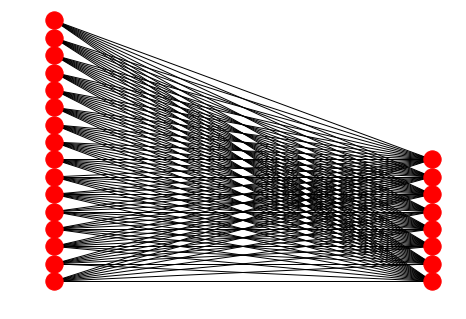

In [30]:
G = create_graph(df_pruebas) # G = create_graph(df1)
students = df_pruebas.index
companies = df_pruebas.columns

plot_bipartite_graph(G, students, companies)

node1, node2, w = get_best_match(G, 'Company ALL MIN', [])
node1, node2, w

In [31]:
companies

Index(['FAKE', 'FAKE II', 'Movetia', 'Exoticca', 'The Hotels Network',
       'Company ALL MAX', 'Company ALL MIN', 'Company ALL MID'],
      dtype='object', name='name')

In [32]:
RONDAS = 3 #10
MESAS = min(len(students), len(companies))
MESAS

rondas = []

for ronda in range(RONDAS): 
    aux = []
    used = []
    for company in companies: 
        
        node1, node2, w = get_best_match(G, company, used)
        # aux.append((node1, node2, w))
        G.remove_edge(node1, node2)
        
        if node1 == company: 
            used.append(node2)
            aux.append((node1, node2, w))
        else: 
            used.append(node1)
            aux.append((node2, node1, w))
    rondas.append(aux)
    print(rondas)
    
rondas

[[('FAKE', "Nombre falso 1'", {'weight': 0.36598244043439976}), ('FAKE II', 'Student ALL MIN', {'weight': 0.5120921002724442}), ('Movetia', 'Student ALL MID', {'weight': 0.35726102941959076}), ('Exoticca', 'Fake 129', {'weight': 0.3829211377342407}), ('The Hotels Network', 'Fake 125', {'weight': 0.4024570545011118}), ('Company ALL MAX', 'Student ALL MAX', {'weight': 1.0}), ('Company ALL MIN', 'Fake 130', {'weight': 1.0}), ('Company ALL MID', 'Fake 124', {'weight': 0.4294742180302952})]]
[[('FAKE', "Nombre falso 1'", {'weight': 0.36598244043439976}), ('FAKE II', 'Student ALL MIN', {'weight': 0.5120921002724442}), ('Movetia', 'Student ALL MID', {'weight': 0.35726102941959076}), ('Exoticca', 'Fake 129', {'weight': 0.3829211377342407}), ('The Hotels Network', 'Fake 125', {'weight': 0.4024570545011118}), ('Company ALL MAX', 'Student ALL MAX', {'weight': 1.0}), ('Company ALL MIN', 'Fake 130', {'weight': 1.0}), ('Company ALL MID', 'Fake 124', {'weight': 0.4294742180302952})], [('FAKE', 'Fake 

[[('FAKE', "Nombre falso 1'", {'weight': 0.36598244043439976}),
  ('FAKE II', 'Student ALL MIN', {'weight': 0.5120921002724442}),
  ('Movetia', 'Student ALL MID', {'weight': 0.35726102941959076}),
  ('Exoticca', 'Fake 129', {'weight': 0.3829211377342407}),
  ('The Hotels Network', 'Fake 125', {'weight': 0.4024570545011118}),
  ('Company ALL MAX', 'Student ALL MAX', {'weight': 1.0}),
  ('Company ALL MIN', 'Fake 130', {'weight': 1.0}),
  ('Company ALL MID', 'Fake 124', {'weight': 0.4294742180302952})],
 [('FAKE', 'Fake 125', {'weight': 0.36598244043439976}),
  ('FAKE II', 'Fake 130', {'weight': 0.5120921002724442}),
  ('Movetia', 'Fake 129', {'weight': 0.35726102941959076}),
  ('Exoticca', 'Student ALL MID', {'weight': 0.3829211377342407}),
  ('The Hotels Network', "Nombre falso 1'", {'weight': 0.4024570545011118}),
  ('Company ALL MAX', 'Fake 126', {'weight': 1.0}),
  ('Company ALL MIN', 'Student ALL MIN', {'weight': 1.0}),
  ('Company ALL MID', 'Fake 132', {'weight': 0.4294742180302952

# favorecemos a los estudiantes. más alumnos que empresas

('Company ALL MID', 'Student ALL MID', {'weight': 1.0})

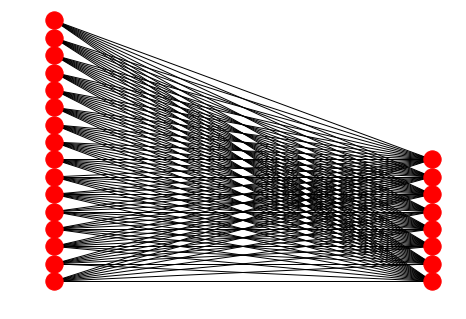

In [35]:
df_pruebas = matching.copy()     

G = create_graph(df_pruebas)
students = df_pruebas.index
companies = df_pruebas.columns

plot_bipartite_graph(G, students, companies)

node1, node2, w = get_best_match(G, 'Company ALL MID', [])
node1, node2, w

In [36]:
MAX_RONDAS = 10

RONDAS = min(MAX_RONDAS, len(companies)) 

rondas = []
print(students)

student_queue = list(students) * RONDAS # vamos a recorrer la lista para ir emparejando
print(student_queue)

for i, student in enumerate(student_queue): 
    aux = []
    used = []
    while True: 
        student = student_queue[i]
        i += 1
        node1, node2, w = get_best_match(G, student, used)
        # aux.append((node1, node2, w))
        G.remove_edge(node1, node2)
    
        # el nodo1 es la compañía (nodo1 no es estudiante)
        if node1 != student: 
            used.append(node1)
            aux.append((node1, node2, w))
        # nodo2 es la compañía
        else: 
            used.append(node2)
            aux.append((node2, node1, w))
        # print(used)
            
        if len(used) == len(companies): 
            break  
            
    rondas.append(aux)

    if len(rondas) == RONDAS: 
        break
    

    
rondas

Index(['Nombre falso 1'', 'Student ALL MAX', 'Student ALL MID',
       'Student ALL MIN', 'Fake 123', 'Fake 124', 'Fake 125', 'Fake 126',
       'Fake 127', 'Fake 128', 'Fake 129', 'Fake 130', 'Fake 131', 'Fake 132',
       'Fake 133', 'Fake 134'],
      dtype='object', name='name')
["Nombre falso 1'", 'Student ALL MAX', 'Student ALL MID', 'Student ALL MIN', 'Fake 123', 'Fake 124', 'Fake 125', 'Fake 126', 'Fake 127', 'Fake 128', 'Fake 129', 'Fake 130', 'Fake 131', 'Fake 132', 'Fake 133', 'Fake 134', "Nombre falso 1'", 'Student ALL MAX', 'Student ALL MID', 'Student ALL MIN', 'Fake 123', 'Fake 124', 'Fake 125', 'Fake 126', 'Fake 127', 'Fake 128', 'Fake 129', 'Fake 130', 'Fake 131', 'Fake 132', 'Fake 133', 'Fake 134', "Nombre falso 1'", 'Student ALL MAX', 'Student ALL MID', 'Student ALL MIN', 'Fake 123', 'Fake 124', 'Fake 125', 'Fake 126', 'Fake 127', 'Fake 128', 'Fake 129', 'Fake 130', 'Fake 131', 'Fake 132', 'Fake 133', 'Fake 134', "Nombre falso 1'", 'Student ALL MAX', 'Student ALL MID'

[[('The Hotels Network', "Nombre falso 1'", {'weight': 0.4024570545011118}),
  ('Company ALL MAX', 'Student ALL MAX', {'weight': 1.0}),
  ('Company ALL MID', 'Student ALL MID', {'weight': 1.0}),
  ('Company ALL MIN', 'Student ALL MIN', {'weight': 1.0}),
  ('FAKE II', 'Fake 123', {'weight': 0.30620862209165395}),
  ('Exoticca', 'Fake 124', {'weight': 0.3129697698932891}),
  ('FAKE', 'Fake 125', {'weight': 0.36598244043439976}),
  ('Movetia', 'Fake 126', {'weight': 0.2828214874652646})],
 [('Company ALL MID', 'Student ALL MAX', {'weight': 0.32801462664013137}),
  ('Exoticca', 'Student ALL MID', {'weight': 0.3829211377342407}),
  ('FAKE II', 'Student ALL MIN', {'weight': 0.5120921002724442}),
  ('Company ALL MIN', 'Fake 123', {'weight': 0.29677636978315464}),
  ('The Hotels Network', 'Fake 124', {'weight': 0.35921108922156736}),
  ('Movetia', 'Fake 125', {'weight': 0.28379092933372896}),
  ('Company ALL MAX', 'Fake 126', {'weight': 1.0}),
  ('FAKE', 'Fake 127', {'weight': 0.36598244043439

In [37]:
def rondas2string(rondas):
    res = ''
    for i, ronda in enumerate(rondas): 
        res += '\n\nRonda {}'.format(i)
        for c, s, w in ronda: 
            res += '\nCompany: {} -> Student: {} -> Matching: {}'.format(c, s, w)
        
    return res
        
        
text = rondas2string(rondas)

with open("Rondas.txt", "w") as f:
    f.write(text)